# Background

In recent years, online shopping has become one of the primary channels for apparel sales in the UK. According to statistics from Statista, since the COVID-19 pandemic in 2020, online clothing purchases have accounted for over 50% of the UK's apparel sales revenue. Many merchants increasingly focus on online sales, and some brands, such as Shein, exclusively sell through the Internet. While online shopping reduces travel costs and selection costs for consumers, most find it difficult to obtain sufficient information about fabric, fit, and size from website descriptions and images. Therefore, reviews from other consumers are one of the most relied-upon sources of information for online clothing purchases.

Training a machine learning model can serve two purposes. Firstly, it can help customers make better decisions about purchasing a garment based on others' reviews, thereby reducing the time and material waste caused by returns. The natural language used in reviews is not always interpreted correctly by others; for instance, a customer's subtle criticism of a product might be mistaken for a recommendation, or their lengthy comments might be too daunting or difficult to analyses for attitude. This is true for both customers and merchants. Merchants can use the model to monitor every item they sell. Based on public reviews, they can adjust their products' production and inventory levels to increase profits. With fast fashion brands, many products have too short a life cycle to determine their popularity through quarterly financial reports.


# Loading dataset and exploring the dataset

In [1]:
#Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Import required packages for dataset preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
# Packages for model building
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score  
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yifanwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yifanwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yifanwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Load the dataset
clothes_review= pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)
clothes_review

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Recommended IND
1    19314
0     4172
Name: count, dtype: int64


<Axes: xlabel='Recommended IND'>

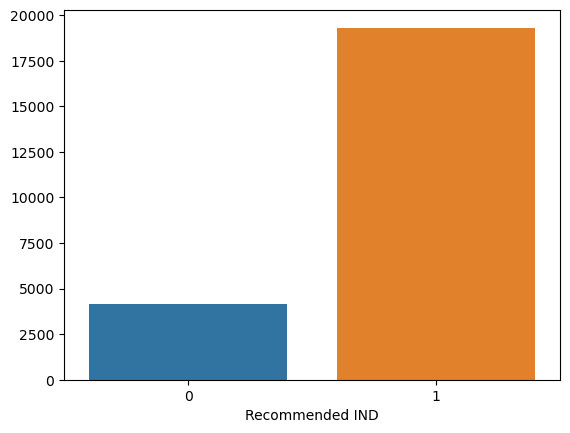

In [3]:
# Show the distrubtion of each class
classification_distribution=clothes_review['Recommended IND'].value_counts()
print(classification_distribution)
sns.barplot(x=classification_distribution.index, y=classification_distribution.values)

In [4]:
# Check missing value
clothes_review.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
#Drop the row that have no review text input
clothes_review_copy=clothes_review.copy()
clothes_review_clean = clothes_review_copy.dropna(subset=['Review Text'])
clothes_review_clean

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Recommended IND
1    18540
0     4101
Name: count, dtype: int64


<Axes: xlabel='Recommended IND'>

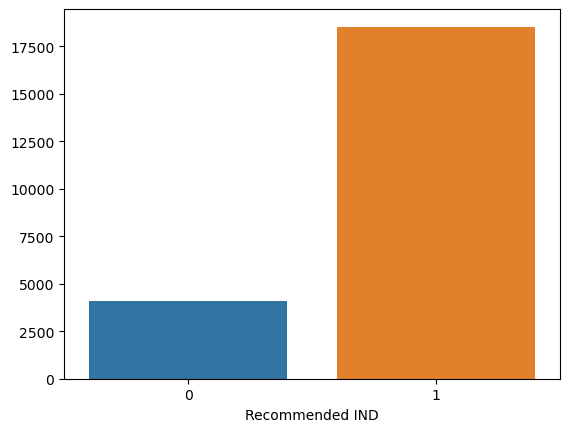

In [6]:
# Show the distrubtion of each class after drop N.A
classification_distribution_clean=clothes_review_clean['Recommended IND'].value_counts()
print(classification_distribution_clean)
sns.barplot(x=classification_distribution_clean.index, y=classification_distribution_clean.values)

In [7]:
# Check the average length of review for both class 
clothes_review_count=clothes_review_clean.copy()
clothes_review_count.loc[:, 'word_count'] = clothes_review_count['Review Text'].apply(lambda x: len(str(x).split()))
print(clothes_review_count[clothes_review_count['Recommended IND']==1]['word_count'].mean()) 
print(clothes_review_count[clothes_review_count['Recommended IND']==0]['word_count'].mean())

59.797357065803666
62.001950743721046


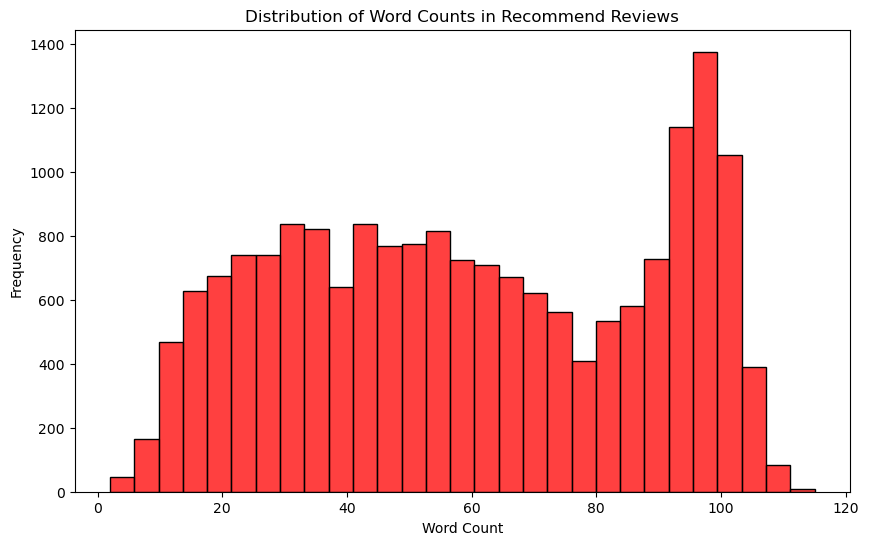

In [8]:
# Show the word count distribution of recommend reviews
plt.figure(figsize=(10, 6))
good_words=clothes_review_count[clothes_review_count['Recommended IND']==1]['word_count']
sns.histplot(good_words, color='red')
plt.title('Distribution of Word Counts in Recommend Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

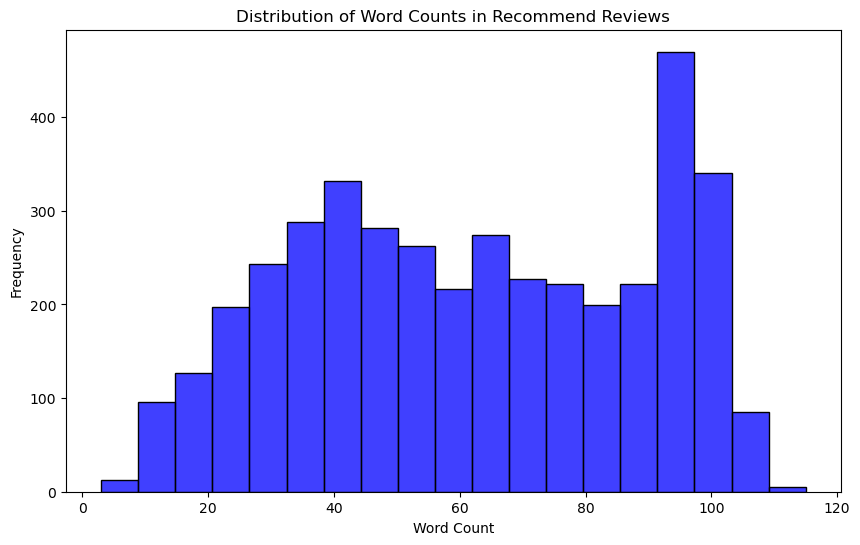

In [9]:
# Show the word count distribution of not recommend reviews
plt.figure(figsize=(10, 6))
good_words=clothes_review_count[clothes_review_count['Recommended IND']==0]['word_count']
sns.histplot(good_words, color='blue')
plt.title('Distribution of Word Counts in Recommend Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Introducing the dataset

This database was downloaded from Kaggle. The author collected 23,486 customer reviews on various brands and clothing items. Each review includes several pieces of information: Clothing, Age, Title, Review Text, Rating, Recommended IND, Positive Feedback Count, Division Name, Department Name, and Class Name. This model will use Review Text as the feature and Recommended IND as the label for training. Each Review Text contains a customer's comment in a string format. The Recommended IND contains only two integers, 0 or 1, where 0 represents not recommended, and 1 illustrates recommended.

The dataset includes 19,314 entries labelled as 1 and only 4,172 entries labelled as 0, indicating an imbalance in the dataset. There are 845 Review Texts with no content and no missing values in Recommended IND. The length of the strings in the Review Text ranges from 0 to 120 words, with the distribution not following a normal distribution. Reviews of 90-100 words are the most common. Reviews shorter than 10 words or longer than 110 words are very rare, indicating that most of the reviews in the dataset are meaningful, with relatively few noisy comments. Simultaneously, customers' reviews for Recommended IND 0 and 1 have similar length distributions, so there is no need to differentiate between the two labels regarding comment length.

Since the Review Text is the only feature for training this model and it is in the form of variable-length text, it cannot be filled using mean values or other methods. At the same time, missing data only accounts for 3.6% of the total data, so deleting these data will not significantly impact model training. However, the remaining data still suffers from severe imbalance, which needs to be addressed in subsequent processing steps.

## Objectives of the project

The aim of this project is to train a Natural Language Processing (NLP) classifier that can automatically determine whether a customer recommends purchasing a garment based on their review. To achieve this goal, the project is structured into four objectives:

Objective 1: Data Acquisition, Loading, and Display
The first step involves locating, loading, and presenting the dataset. This phase is crucial for understanding the data's structure and preparing for subsequent processing.

Objective 2: Data Cleaning and Preprocessing
The dataset will be cleaned and preprocessed, which includes handling missing data, cleaning natural language data, performing lemmatisation, and transforming text into arrays using Word2Vec. Lemmatisation is preferred over stemming for its ability to retain more complete and accurate word information, which is crucial for deep textual analysis. Since real-time model updates are not required for this project, the trade-off of slightly slower processing speed for accuracy is justified. Word2Vec is chosen for its efficiency and ability to capture the relationships between word meanings, which is vital for sentiment analysis.

Objective 3: Training NLP Classifiers
The core of the project involves training classifiers on the dataset. A Support Vector Machine (SVM) model will be used due to its competence in handling high-dimensional data and nonlinear relationships, making it suitable for this classifier. Additionally, a Naive Bayes model will be trained as a baseline model for comparative purposes.

Objective 4: Model Evaluation and Comparison
The final step is to evaluate the SVM model and compare its performance against the baseline model. This evaluation will help determine the effectiveness of the SVM in accurately predicting customer recommendations based on their reviews.

By the end of this project, a model capable of automatically interpreting customer sentiment and recommendations from text reviews will be established, offering valuable insights for e-commerce and online retail sectors.


## Evaluation methodology

To evaluate the performance of the models, the following metrics will be used:

Confusion Matrix: This provides a visual representation of the performance of the classifier. It shows the distribution of True Positives, True Negatives, False Positives, and False Negatives. Given the potential imbalance in the dataset with fewer labels of '0', the confusion matrix becomes an essential tool to understand how well the model distinguishes between the classes.

Precision Score: Precision is crucial for this project as it indicates the accuracy of positive predictions. It measures the ratio of correctly predicted positive observations to the total predicted positives. This metric is particularly important when the cost of False Positives is high.

Recall Score: Also known as Sensitivity or True Positive Rate, recall is necessary for this dataset as it measures the ratio of correctly predicted positive observations to the all observations in actual class '1'. This metric is important when the cost of False Negatives is high, which is a concern due to the fewer labels of '0' in the dataset.

F1-Score: The F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both False Positives and False Negatives into account. It is a useful measure when seeking a balance between Precision and Recall, especially in an imbalanced dataset.

ROC-AUC Score: The Receiver Operating Characteristic (ROC) curve is a plot of the True Positive Rate against the False Positive Rate at various threshold settings. The Area Under the Curve (AUC) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting '0s' as '0s' and '1s' as '1s'. The AUC-ROC is a crucial measure of the model's performance for an imbalanced dataset.

By employing these metrics, a comprehensive assessment of the SVM model's performance can be made, especially in comparison to the Naïve Bayes baseline model. This approach will provide a thorough understanding of the strengths and weaknesses of the models in handling the imbalanced dataset and predicting customer recommendations based on their reviews.


# Dataset Pre-processing

### Clean-up the review text

In [10]:
def clean_text(text):
    """A function to remove all punctuation, special characters within the text"""
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

In [11]:
# Apply the function to cleanup the review text
clothes_review_text_clean=clothes_review_clean.copy()
clothes_review_text_clean['Review Text Cleaned'] = clothes_review_text_clean['Review Text'].apply(clean_text)
clothes_review_text_clean

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text Cleaned
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfo...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress its sooo pretty i happened t...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit its fun flirty ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,I was very happy to snag this dress at such a ...
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,It reminds me of maternity clothes soft stretc...
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,This fit well but the top was very see through...
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,I bought this dress for a wedding i have this ...


### Double check any missing value within the text and class

In [12]:
# Double check any empty value within review text
clothes_review_text_clean['Review Text Cleaned'].isnull().any()

False

In [13]:
# Double check any empty value within recommend IND
clothes_review_text_clean['Recommended IND'].isnull().any()

False

### Normalisation the text 

I choose the lemmatisation the text due to I want to analysis sentiment of a text and lemmatisation although costs more resource but this method would retain the actual meaning of the text better than simply stemming. This advantage will be useful in the following sentiment analysis model build up.

In [14]:
# Initialize the package for Lemmatisation
lemmatisation = WordNetLemmatizer()

In [15]:
def normalise_text(text):
    """This function will normalise the text format into lowercase and lemmatisation the words"""
    # Transfer into lowercase
    text = text.lower()
    # Split the context into individual words
    words = text.split()
    # Delete the stop word
    words = [word for word in words if word not in stopwords.words('english')]
    # lemmatisation
    words = [lemmatisation.lemmatize(word) for word in words] 
    # combine into a new text
    text = ' '.join(words)
    return text

In [16]:
# Apply normalisation function to the cleaned text
clothes_review_text_normalised=clothes_review_text_clean.copy()
clothes_review_text_normalised['Review Text norm'] = clothes_review_text_normalised['Review Text Cleaned'].apply(normalise_text)
clothes_review_text_normalised

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text Cleaned,Review Text norm
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,I was very happy to snag this dress at such a ...,happy snag dress great price easy slip flatter...
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,It reminds me of maternity clothes soft stretc...,reminds maternity clothes soft stretchy shiny ...
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,This fit well but the top was very see through...,fit well top see never would worked im glad ab...
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,I bought this dress for a wedding i have this ...,bought dress wedding summer cute unfortunately...


In [17]:
clothes_review_text_normalised.to_csv('clothes_review_lemmatized.csv')

### Text representation

First split training and testing dataset

In [18]:
#Split training and test set as ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(clothes_review_text_normalised["Review Text norm"],clothes_review_text_normalised["Recommended IND"],test_size=0.2,shuffle=True)

In [19]:
X_train

12812    love first saw online thought bit pricey plain...
18116    first jean fit really well usually wear mother...
1941     like many issue tried normal size x couldnt ge...
2506     comfortable wear wear season run true size nic...
9264     typically order petite clothingi unsure dresst...
                               ...                        
16939    problem neck although pretty button detail bac...
5227           love cord soft great fit bought three color
17985    many retailer top day lot fabric tee hang fair...
15904    gave star havent worn yet dont know fabric wea...
6        aded basket hte last mintue see would look lik...
Name: Review Text norm, Length: 18112, dtype: object

In [20]:
X_test

15844    color heft style quality perfect go one size s...
15316    love dress spotted store yesterday right walki...
11027    love top make sure size usually small blouse s...
7173     love dress design gorgeous however bust extrem...
451      vest warm soft actually fleece almost appears ...
                               ...                        
17508    skirt absolutely beautiful person metallic thr...
4860     ordered red color way bird print cute said cut...
2735     top caught eye right away obsessed everything ...
8195     opened package loved skirt immediately held wa...
13994    dress versatile cool comfortable summer one co...
Name: Review Text norm, Length: 4529, dtype: object

In [21]:
y_train

12812    1
18116    1
1941     1
2506     1
9264     1
        ..
16939    1
5227     1
17985    1
15904    1
6        1
Name: Recommended IND, Length: 18112, dtype: int64

In [22]:
y_test

15844    1
15316    1
11027    1
7173     0
451      1
        ..
17508    1
4860     0
2735     1
8195     1
13994    1
Name: Recommended IND, Length: 4529, dtype: int64

Due to I plan to use word2vec as text representation method; thus, I need to tokenize the word within the text aftert clean up.

In [23]:
# Training Text Tokenization
X_train_token = X_train.apply(lambda x: word_tokenize(x))
X_train_token

12812    [love, first, saw, online, thought, bit, price...
18116    [first, jean, fit, really, well, usually, wear...
1941     [like, many, issue, tried, normal, size, x, co...
2506     [comfortable, wear, wear, season, run, true, s...
9264     [typically, order, petite, clothingi, unsure, ...
                               ...                        
16939    [problem, neck, although, pretty, button, deta...
5227     [love, cord, soft, great, fit, bought, three, ...
17985    [many, retailer, top, day, lot, fabric, tee, h...
15904    [gave, star, havent, worn, yet, dont, know, fa...
6        [aded, basket, hte, last, mintue, see, would, ...
Name: Review Text norm, Length: 18112, dtype: object

In [24]:
# Testing Text Tokenization
X_test_token = X_test.apply(lambda x: word_tokenize(x))
X_test_token

15844    [color, heft, style, quality, perfect, go, one...
15316    [love, dress, spotted, store, yesterday, right...
11027    [love, top, make, sure, size, usually, small, ...
7173     [love, dress, design, gorgeous, however, bust,...
451      [vest, warm, soft, actually, fleece, almost, a...
                               ...                        
17508    [skirt, absolutely, beautiful, person, metalli...
4860     [ordered, red, color, way, bird, print, cute, ...
2735     [top, caught, eye, right, away, obsessed, ever...
8195     [opened, package, loved, skirt, immediately, h...
13994    [dress, versatile, cool, comfortable, summer, ...
Name: Review Text norm, Length: 4529, dtype: object

In [25]:
# Training word2vec model
model_w2v = Word2Vec(X_train_token, vector_size=100, window=5, min_count=1, workers=4)

In [26]:
def document_vector(word_list, model):
    """generate the average w2v vector for each text"""
    word_list = [word for word in word_list if word in model.wv.index_to_key]
    if len(word_list) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[word_list], axis=0)

In [27]:
# Using the trained W2V model for transformation 
X_train_w2v = [document_vector(doc, model_w2v) for doc in X_train_token]
X_test_w2v = [document_vector(doc, model_w2v) for doc in X_test_token]

# Training model

## Naive Bayes model

In [28]:
# Initialize the naive bayes model
model_nb=GaussianNB()

In [29]:
# Train the naive bayes model
model_nb.fit(X_train_w2v,y_train)

GaussianNB()

In [30]:
# Use newly build naive bayes model to predict
y_pred_nb=model_nb.predict(X_test_w2v)

In [31]:
joblib.dump(model_nb, 'model_nb_clothes.joblib')

['model_nb_clothes.joblib']

## SVM model

In [32]:
# Initialize svm model
model_svm = svm.SVC(probability=True)

In [33]:
# Setup grid search parameter
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
grid_search_svm = GridSearchCV(model_svm, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

In [34]:
# Training and tuning hyperparameters
grid_search_svm.fit(X_train_w2v, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [35]:
# Show the best parameters combo and use that combo for the svm model
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)
best_svm = grid_search_svm.best_estimator_

Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.8713564467030916


In [36]:
y_pred_svm=best_svm.predict(X_test_w2v)

In [37]:
joblib.dump(best_svm, 'model_svm_clothes.joblib')

['model_svm_clothes.joblib']

# Evaluation of two models

## Naive Bayes model

In [38]:
# Evaluate the performance of the naive bayes model
print (classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.35      0.81      0.49       814
           1       0.94      0.68      0.79      3715

    accuracy                           0.70      4529
   macro avg       0.65      0.74      0.64      4529
weighted avg       0.84      0.70      0.73      4529



In [39]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [40]:
print('accuracy:' ,accuracy_nb)
print('precision:' ,precision_nb)
print('recall:' ,recall_nb)
print('f1 score:' ,f1_nb)

accuracy: 0.7005961580922941
precision: 0.9415949082740547
recall: 0.676985195154778
f1 score: 0.7876605073598497


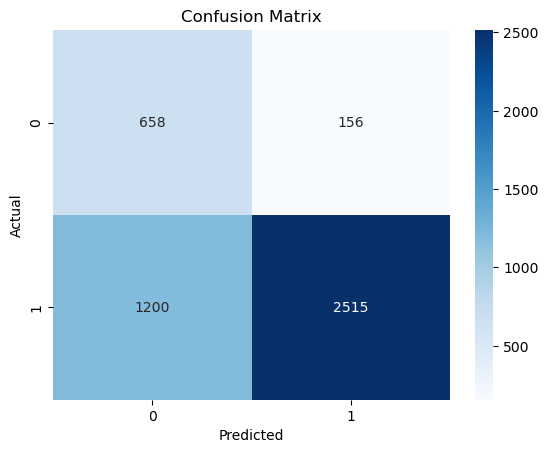

In [41]:
# Show confusion matrix of native bayes model
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#Calculate AUC
y_prob = model_nb.predict_proba(X_test_w2v)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.7426695017542931


## SVM model

In [44]:
# Evaluate the performance of the naive bayes model
print (classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57       814
           1       0.89      0.95      0.92      3715

    accuracy                           0.87      4529
   macro avg       0.80      0.72      0.75      4529
weighted avg       0.86      0.87      0.86      4529



In [45]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [46]:
print('accuracy:' ,accuracy_svm)
print('precision:' ,precision_svm)
print('recall:' ,recall_svm)
print('f1 score:' ,f1_svm)

accuracy: 0.8692868182821815
precision: 0.8936223846735568
recall: 0.9542395693135935
f1 score: 0.9229367352252017


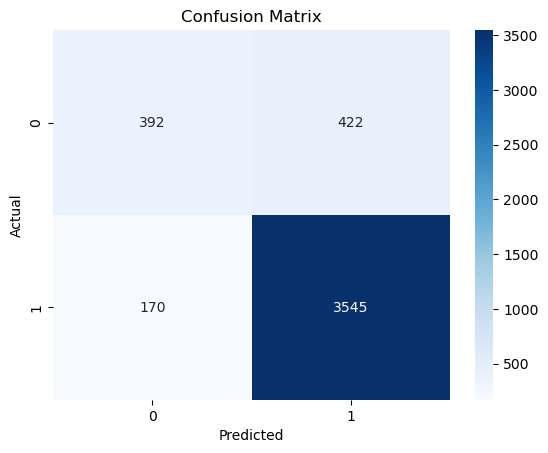

In [47]:
# Show confusion matrix of SVM model
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
#Calculate AUC
y_prob_svm = best_svm.predict_proba(X_test_w2v)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.8961008726822994


# Evaluation and Discussion

## Evaluation

The project trained two machine learning models, with the Naïve Bayes model serving as the baseline and the Support Vector Machine (SVM) model as the primary model for comparison. Here's a detailed analysis of their performances:

Naïve Bayes Model

Precision Score: High at 0.942, indicating that when the model predicts a label of 1, it is very likely to be correct.
Recall Score: Low at 0.677, suggesting a high false negative rate. This, combined with the high precision, indicates the model's tendency to miss true positives.
F1 Score: Moderately high at 0.788, reflecting an average overall prediction performance.
ROC-AUC Score: Similar to the F1 Score at 0.743, indicating moderate balance in model performance.
Confusion Matrix: Reveals a significant imbalance with about 1200 false negatives, far exceeding the true negatives.

SVM Model

Precision Score: Slightly lower than the Naïve Bayes model at 0.894, but still high.
Recall Score: Significantly higher at 0.954, indicating a much lower rate of false negatives.
F1 Score: High at 0.923, showing a better balance between precision and recall compared to the Naïve Bayes model.
ROC-AUC Score: Higher at 0.896, suggesting a more reliable performance in predicting both labels 0 and 1.
Confusion Matrix: Shows a better balance with a marginally higher false positive rate compared to the Naïve Bayes model, but significantly fewer false negatives.

The SVM model outperforms the Naïve Bayes baseline in several key areas. Despite a slightly lower precision, its significantly higher recall and F1 scores indicate a more balanced and accurate performance in predicting customer recommendations. The SVM's ability to maintain high performance despite the dataset's imbalance is particularly noteworthy. The ROC-AUC score and the confusion matrix further corroborate the superior performance of the SVM model compared to the baseline Naïve Bayes model. This demonstrates the effectiveness of the SVM in this specific application, highlighting its suitability for handling imbalanced datasets and complex prediction tasks.


## Discussion

In this project, by analysing over 20,000 clothing reviews, I developed a model using the SVM algorithm capable of discerning customers' attitudes in their reviews. This model enables consumers to easily determine whether a reviewer recommends an item of clothing, guiding their purchasing decisions. Additionally, retailers can utilise this model to monitor customer attitudes towards each garment in their inventory, allowing them to adjust production and stock levels accordingly. With an accuracy exceeding 90%, this model is a valuable reference tool.

This model's application is not limited to the clothing retail sector; it can also be applied in areas such as video streaming services, cinemas, and any other domain where consumer opinions are valuable. By employing this model, businesses can reduce costs and enhance customer experience.

For future iterations of the project, I would consider making changes in three key areas:

Data Preprocessing: I would employ more nuanced preprocessing techniques. For example, using different normalisation methods for nouns, adverbs, and adjectives - perhaps stemming for nouns and lemmatisation for adverbs and adjectives, which are more attitude-related. This approach could improve the efficiency of the project while maintaining prediction accuracy.

Vectorisation Model: Although Word2Vec is suitable for this project, it struggles with out-of-vocabulary (OOV) words. In future projects, I might explore using FastText for word vectorisation to handle OOV issues and small corpora better.

Advanced Modeling Techniques: Considering more complex models like Neural Networks or GPT for training could be beneficial. While the SVM achieved respectable performance, its accuracy wasn't exceptional, and in some respects, it even fell short of the simpler Naïve Bayes model, possibly due to the nature of the data. Introducing a more sophisticated and precise model could enhance accuracy.

In summary, I successfully established an NLP classifier capable of interpreting consumer sentiments in their reviews by processing data and training the model. This accomplishment demonstrates the potential of machine learning in extracting valuable insights from textual data.